<a href="https://colab.research.google.com/github/SamaSamrin/Computer-Vision-Assignments/blob/main/Vision_Final_Question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Self-Declaration:** All work submitted in this exam is my own work. I have paraphrased and included references to all resources that helped me arrive at my answers.

In [ ]:
import numpy as np
import scipy
import cv2
from google.colab.patches import cv2_imshow

## Image Pre-processing Techniques

I am using all the pre-processing methods mentioned in question to increase the chance of correct identification. These methods are :
* histogram equalization - this increases contrast which helps with edge detection
* grayscale - this takes away the complexity of three color channels
* binarization - this makes the image even more to separate fruits from the background
* edge detection through LoG - this helps to identify boundaries of the fruits

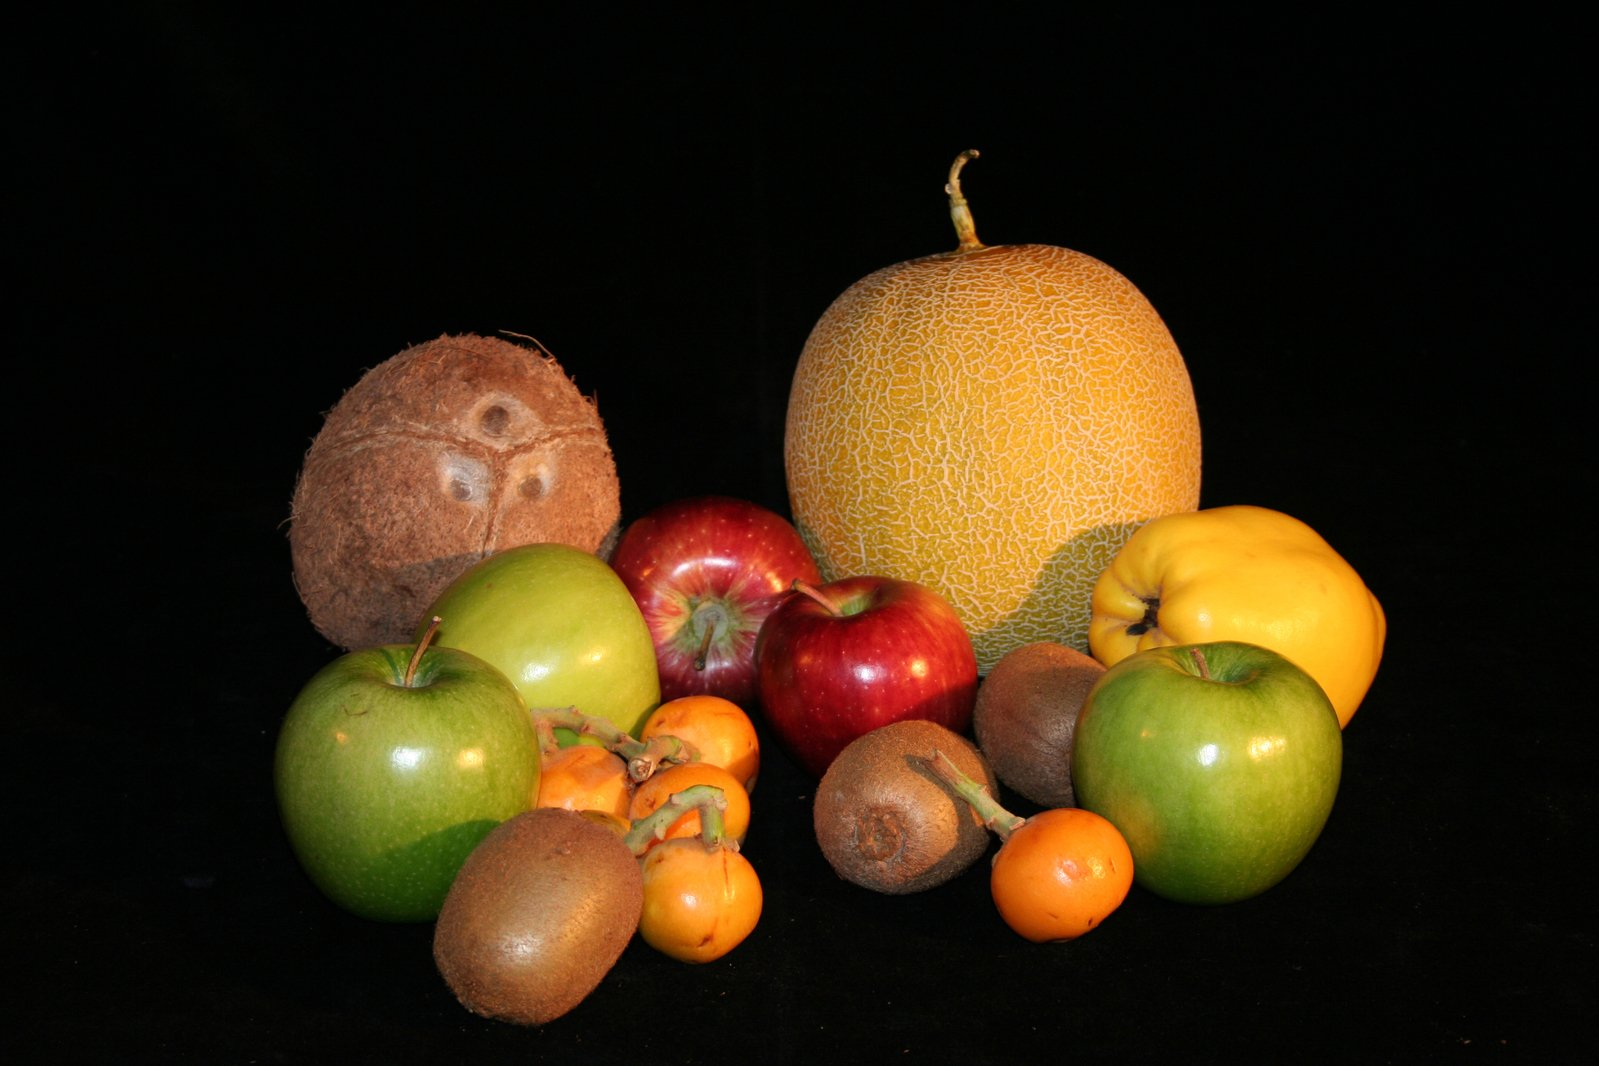

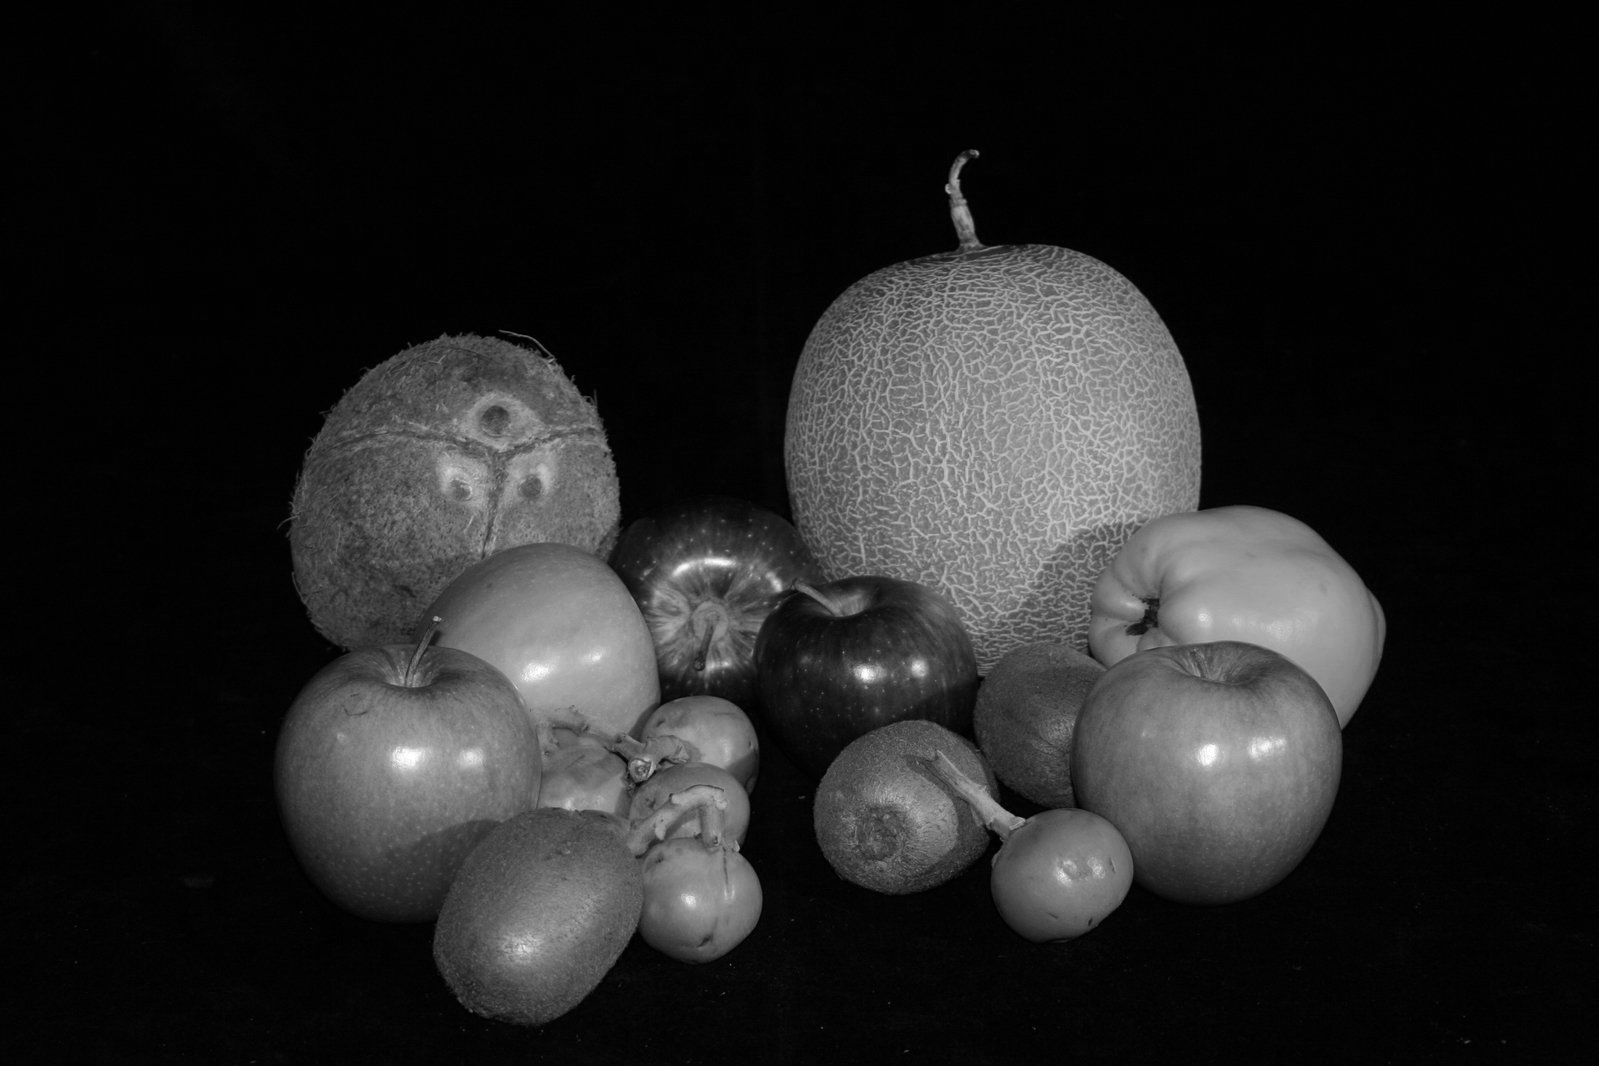

In [ ]:
img = cv2.imread("ExamImageQ3.jpg")

#converting the colorful image into grayscale because as per assignment 1, using Gaussian or
img_gray = cv2.cvtColor(src=img, code=cv2.COLOR_RGB2GRAY)

cv2_imshow(img)
cv2_imshow(img_gray)

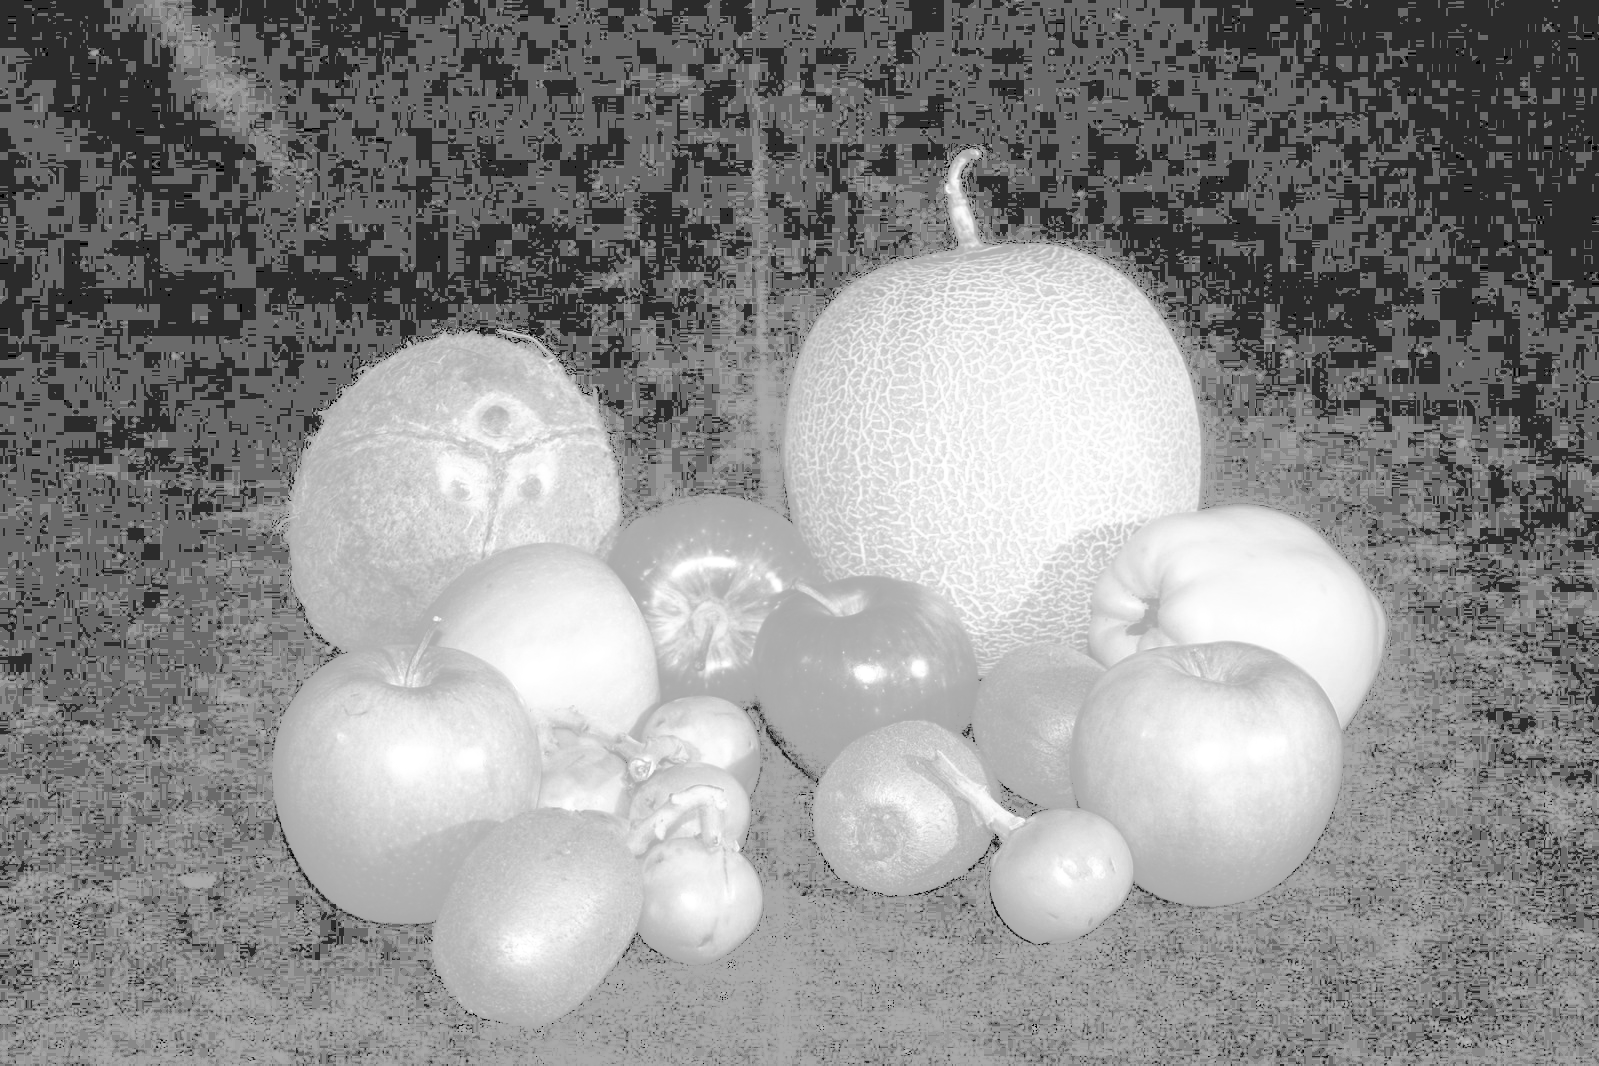

In [ ]:
#increasing contrast with histogram
hist = cv2.equalizeHist(img_gray)

cv2_imshow(hist)

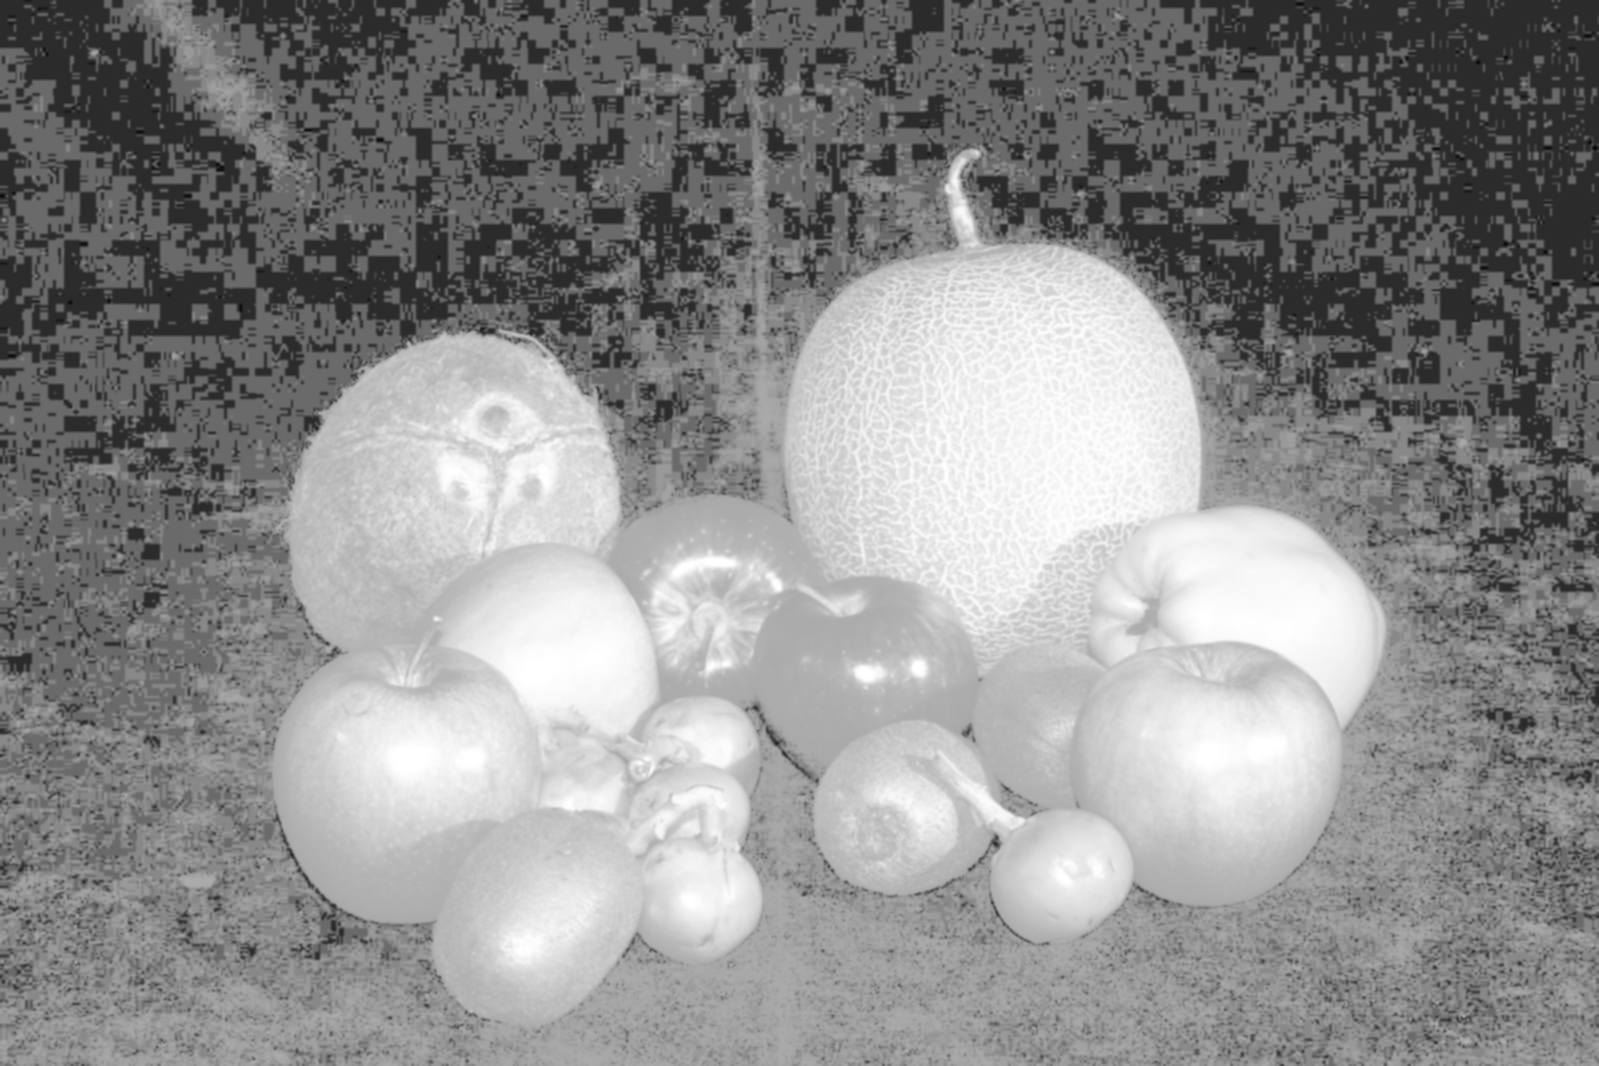

In [ ]:
#making image blurry to reduce noise with Gaussian
gauss = cv2.GaussianBlur(hist, (5,5), 0)

cv2_imshow(gauss)

The value of **sigma** is taken as **2** because 1.5 was still leaving unnecessary elements in the lower part of the image, and values higher than 2 were taking away some of the edges of fruits

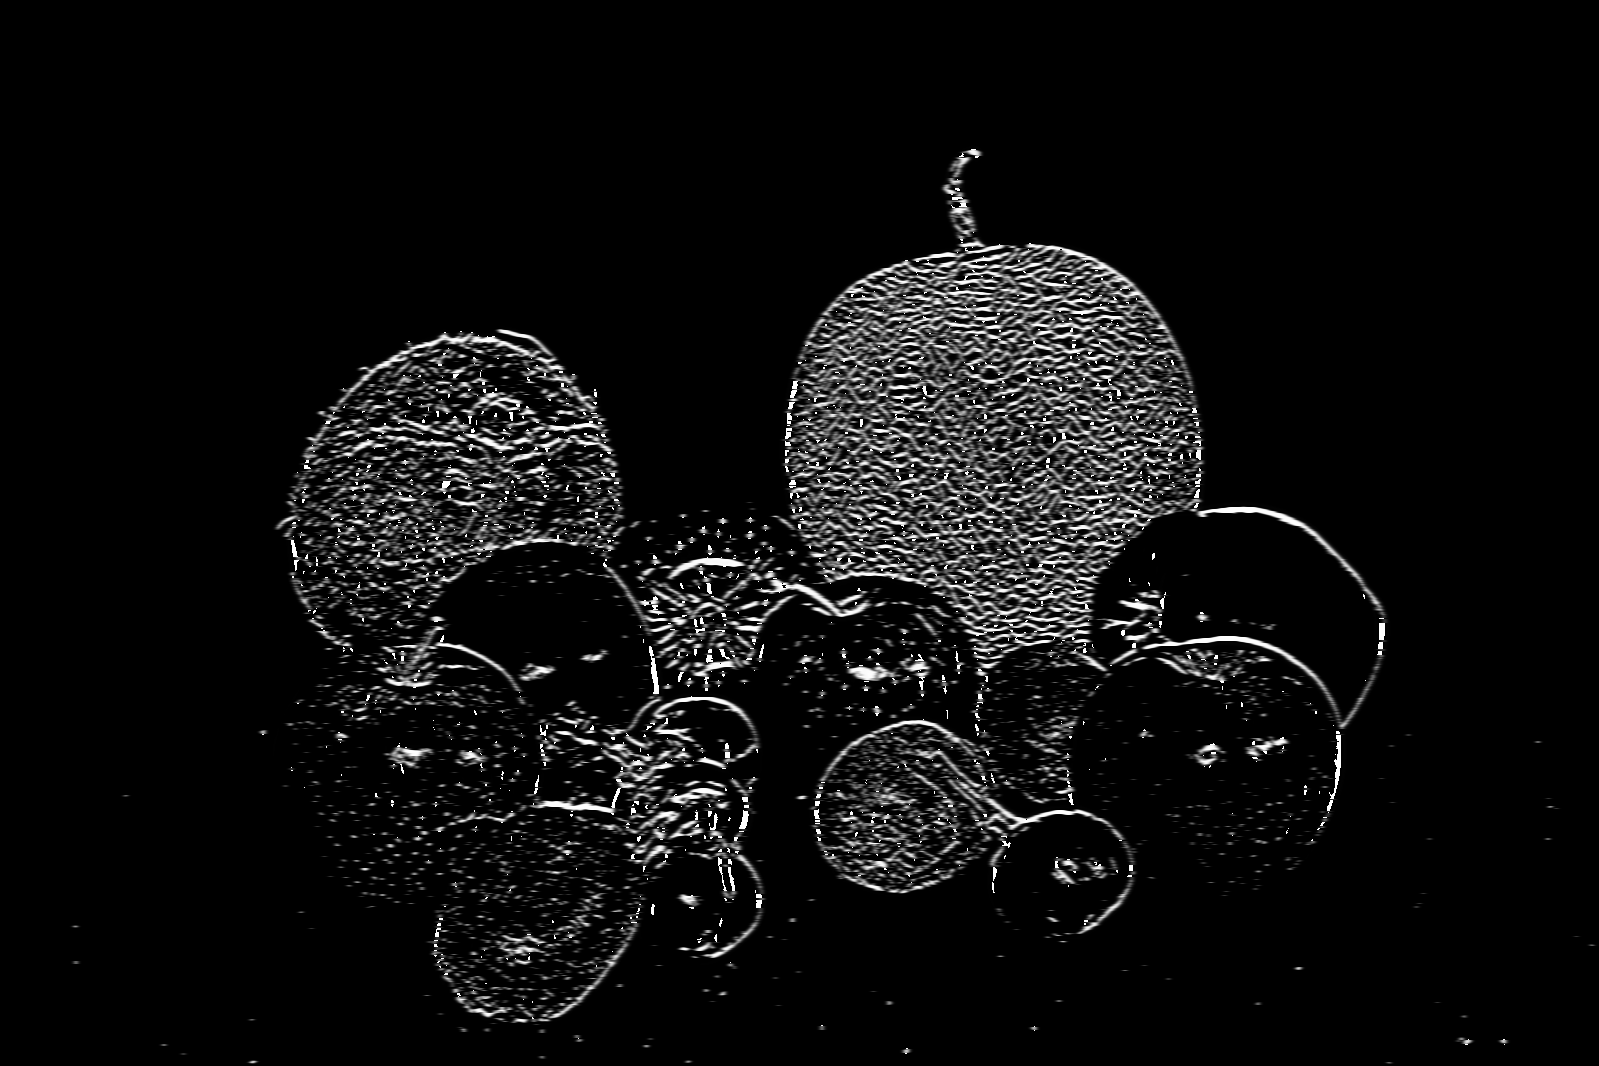

In [ ]:
#using LoG for edge detection
log = scipy.ndimage.gaussian_laplace(img_gray, sigma=2)
#here value of sigma is taken as 2 because 1.5 was still leaving unnecessary elements in the lower part of the image, and values higher than 2 were taking away some of the edges of fruits
cv2_imshow(log)

log = np.uint8(np.absolute(log))

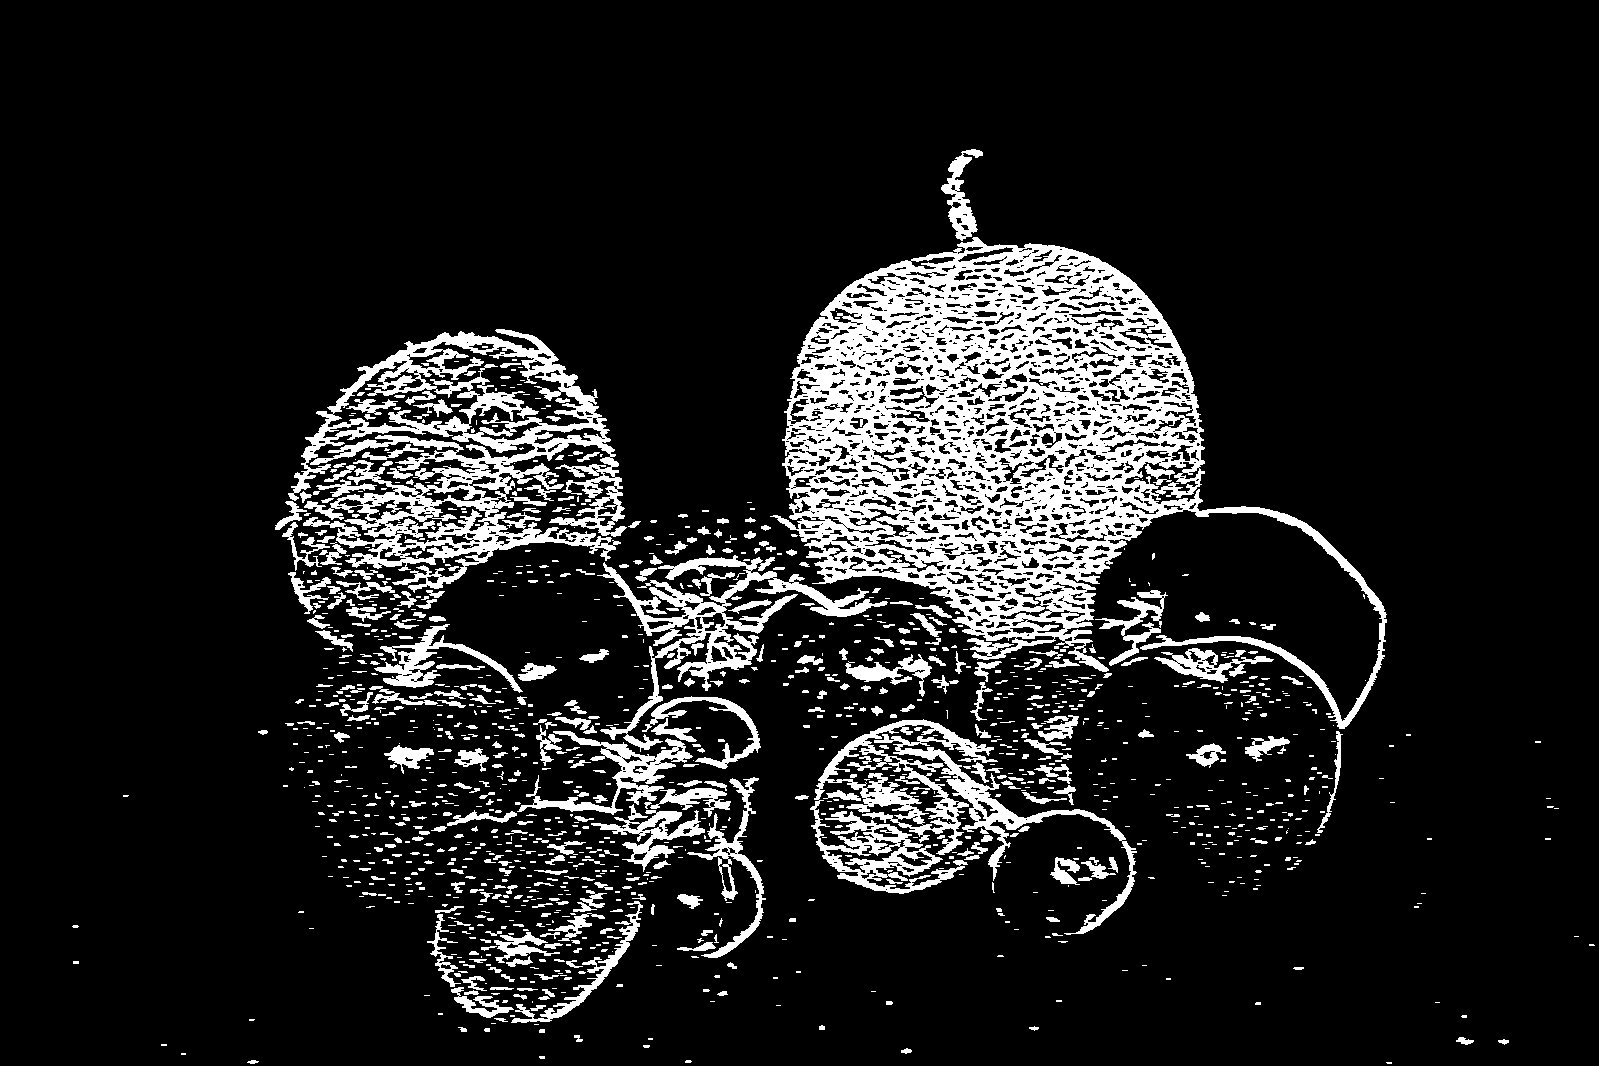

In [ ]:
#making image binary
_, binary_image = cv2.threshold(log, 0.1 * log.max(), 255, cv2.THRESH_BINARY)

cv2_imshow(binary_image)

## Drawing circles on the potential fruits

In [ ]:
# finding contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
#reading image again to draw on it, and for easily resetting it if the resulting drawn image is not satisfactory
img = cv2.imread("ExamImageQ3.jpg")

In [ ]:
#to save the count of fruits or circles identified
fruit_count = 0

for contour in contours:
    (x, y), radius = cv2.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(radius)
    if radius>50: #trying to prevent drawing circles on minuscule shadows or reflections
      cv2.circle(img, center, radius, (0, 255, 0), 2)
      fruit_count += 1

print(fruit_count)

12


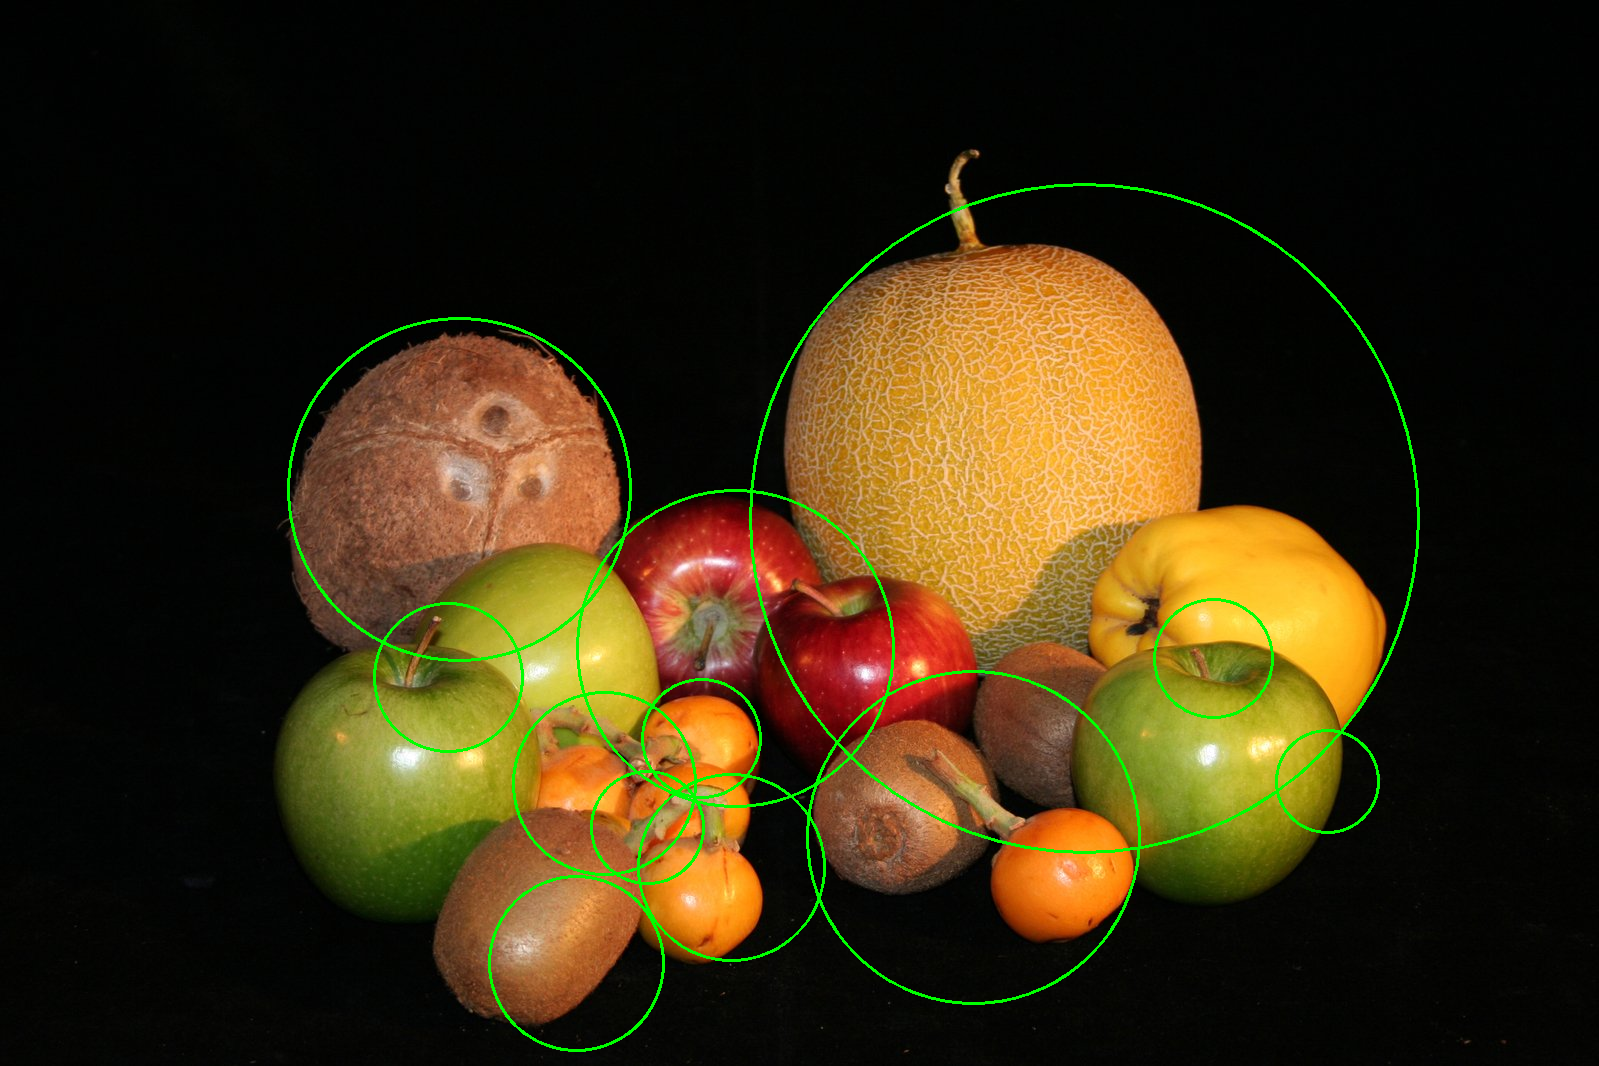

In [ ]:
cv2_imshow(img)

#Result and Analysis

The actual number of **fruits in the given image is 16**, but the **code can only detect 12** fruits and that too including the errors where it
* identified reflections as fruits
* identified rightmos apple as two separate fruits
* identified 2 fruits as 1 fruit in the lower right part
* completely missed the leftmost apple

I am using LoG here because attempting Hough Circles for this was resulting in over 2000 overlapping circles being drawn on the image, and with inaccurate colors.

# Previous Attempts

In [ ]:
log_image = cv2.cvtColor(log_image, cv2.COLOR_BGR2GRAY)

In [ ]:
circles = cv2.HoughCircles(log_image,cv2.HOUGH_GRADIENT,1,20, param1=50,param2=30, minRadius=0, maxRadius=0)

In [ ]:
circles = np.uint16(np.around(circles))

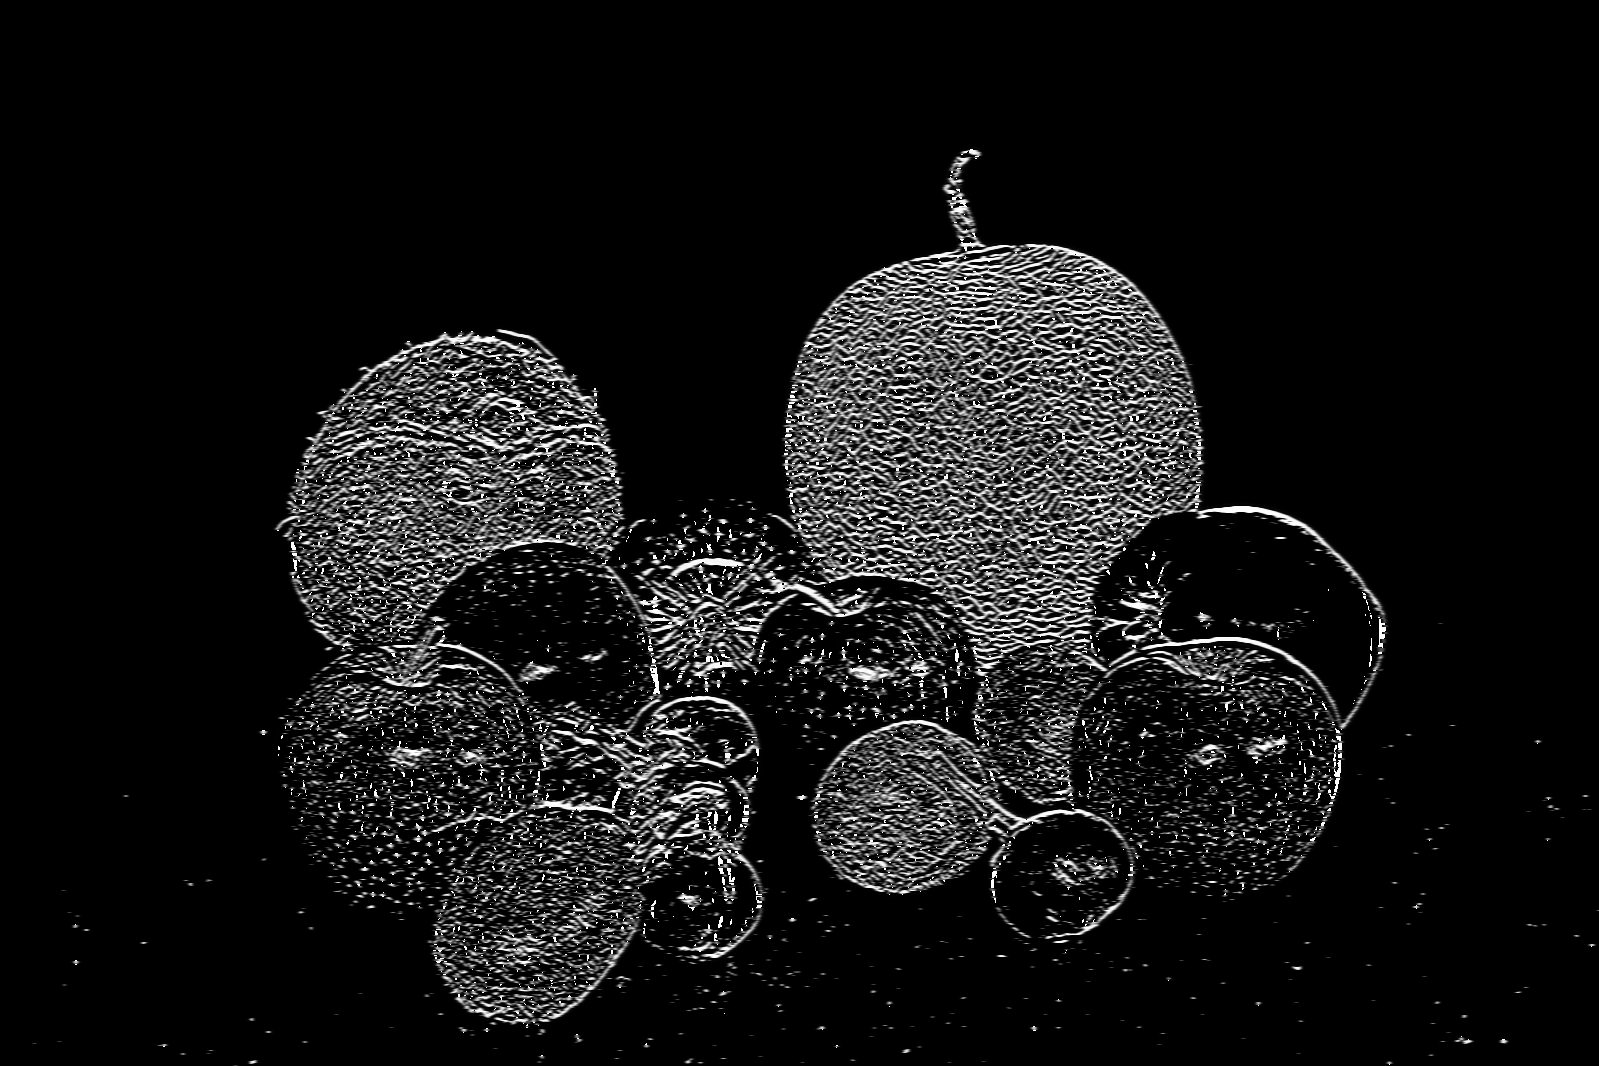

In [ ]:
log_image = scipy.ndimage.gaussian_laplace(img_gray, sigma=1.5)

cv2_imshow(log_image)

In [ ]:
circles.shape

(1, 2591, 3)

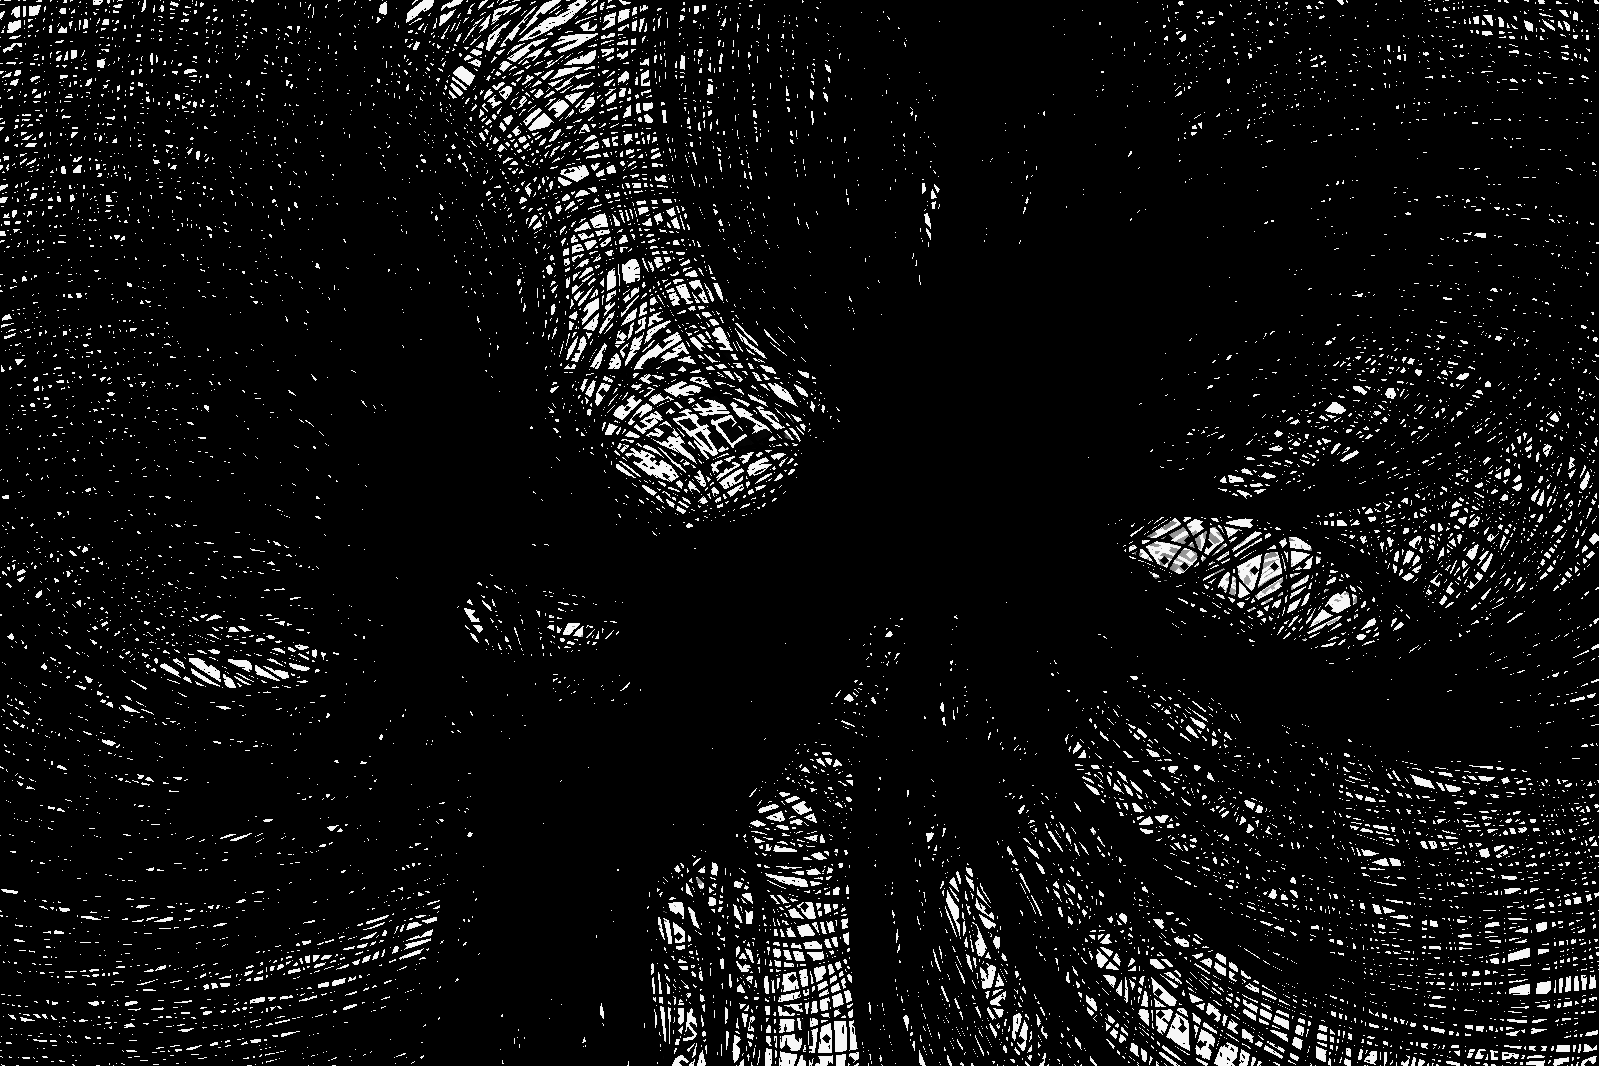

In [ ]:
for i in circles[0,:]:
 # draw the outer circle
 cv2.circle(img_gray,(i[0],i[1]),i[2],(0,255,0),2) #cv2.circle(image, center_coordinates, radius, color, thickness)
 # draw the center of the circle
 cv2.circle(img_gray,(i[0],i[1]),2,(0,0,255),3)

cv2_imshow(img_gray)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv
from skimage.measure import label, regionprops, regionprops_table
from skimage.filters import threshold_otsu
from scipy.ndimage import median_filter
from matplotlib.patches import Rectangle
from tqdm import tqdm

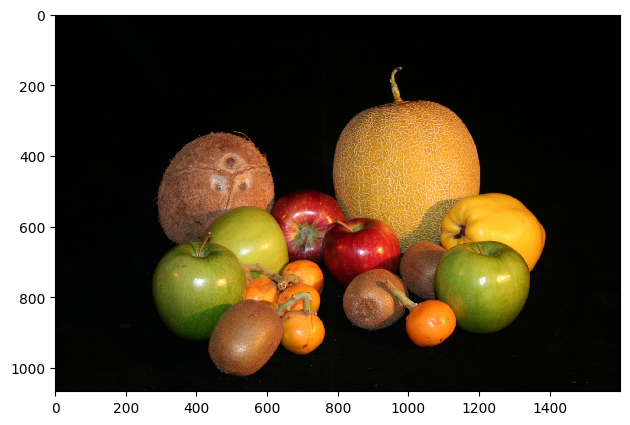

In [ ]:
input = imread('ExamImageQ3.jpg')
imshow(input);

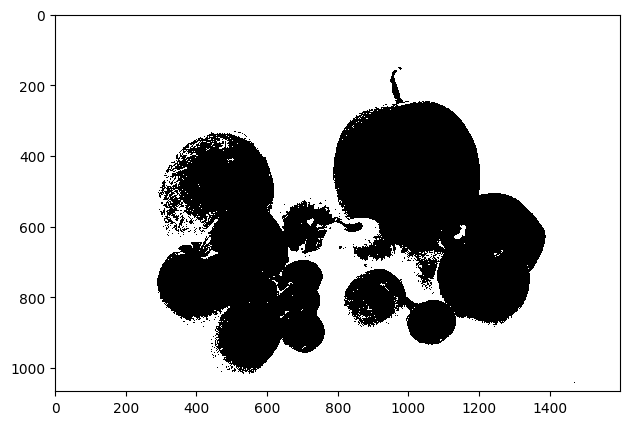

In [ ]:
input_gray = rgb2gray(input)
otsu_thresh = threshold_otsu(input_gray)
input_binary = input_gray < otsu_thresh
imshow(input_binary, cmap = 'gray');

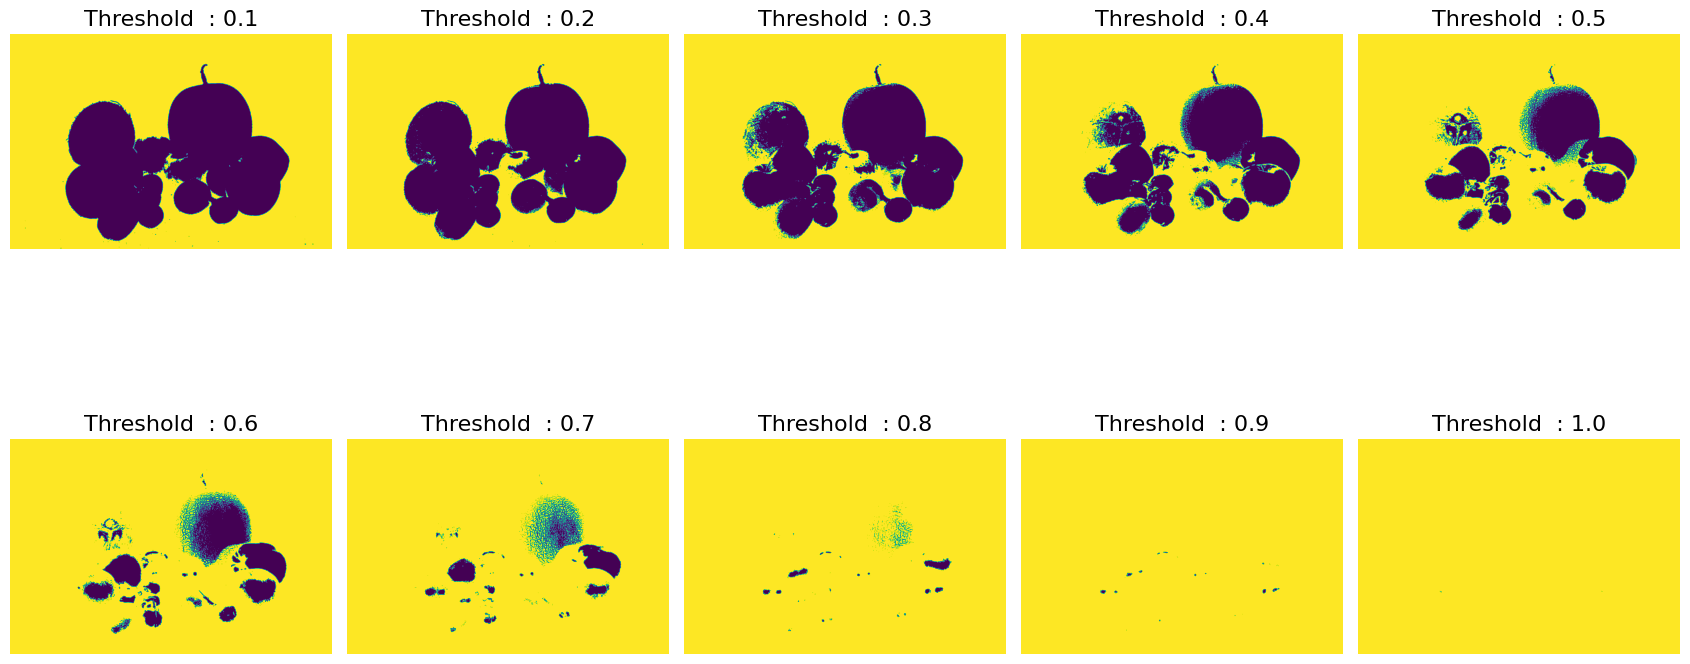

In [ ]:
def threshold_checker(image):
    thresholds =  np.arange(0.1,1.1,0.1)
    tree_gray = rgb2gray(image)
    fig, ax = plt.subplots(2, 5, figsize=(17, 10))
    for n, ax in enumerate(ax.flatten()):
        ax.set_title(f'Threshold  : {round(thresholds[n],2)}',
                       fontsize = 16)
        threshold_fruits = tree_gray < thresholds[n]
        ax.imshow(threshold_fruits);
        ax.axis('off')
    fig.tight_layout()
threshold_checker(input)

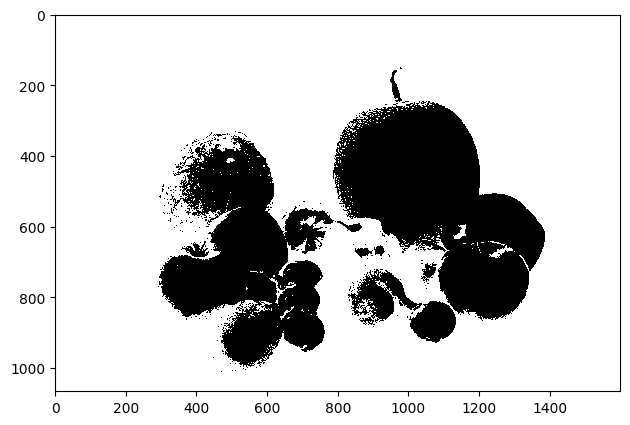

In [ ]:
threshold =  0.3
tree_gray = rgb2gray(img)
threshold_fruits = tree_gray < threshold
imshow(threshold_fruits)

# References

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_laplace.html
* https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html
* https://stackoverflow.com/questions/51411156/is-laplacian-of-gaussian-for-blob-detection-or-for-edge-detection
* https://medium.com/swlh/image-processing-with-python-detecting-blobs-in-digital-images-edebfd22328c
* https://medium.com/data-caffeine/blobs-blobs-and-more-blobs-detection-in-python-7f99d89c9ed9